<a href="https://colab.research.google.com/github/NaraaBold/ComputerVision/blob/main/SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'compVision/assignments/assignment1/'
FOLDERNAME = 'Colab Notebooks/Computer vision/tasks/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
import os
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))
os.chdir('/content/drive/MyDrive/{}'.format(FOLDERNAME))

In [ ]:
import cv2

# reading the image
img = cv2.imread('001.jpg')
# convert to greyscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

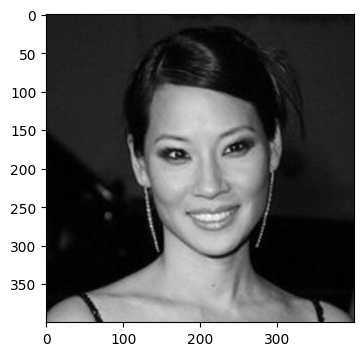

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create figure to plot image to
plt.figure(figsize=(4,4))
plt.imshow(gray, cmap='gray')

In [ ]:
# create SIFT feature extractor
sift = cv2.SIFT_create()

In [ ]:
# detect features from the image
keypoints, descriptors = sift.detectAndCompute(gray, None)

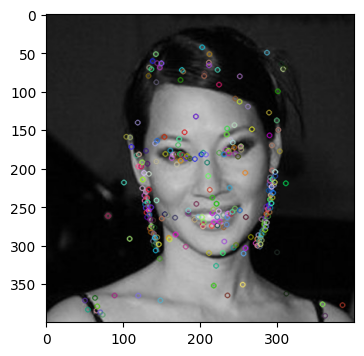

In [ ]:
# draw the detected key points
sift_image = cv2.drawKeypoints(gray, keypoints, img)
# show the image
plt.figure(figsize=(4,4))
plt.imshow(sift_image, cmap='gray')

In [ ]:
# reading the second image
img2 = cv2.imread('Lenna.png')
# convert to greyscale
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [ ]:
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

In [ ]:
print(cv2.KeyPoint_convert(keypoints))

[[ 50.139114 371.59836 ]
 [ 53.959415 383.5558  ]
 [ 63.144764 368.22144 ]
 [ 65.04812  384.65894 ]
 [ 66.078384 379.18362 ]
 [ 69.90665  386.8721  ]
 [ 73.154526 390.14615 ]
 [ 80.10908  261.66962 ]
 [ 80.10908  261.66962 ]
 [ 80.10908  261.66962 ]
 [ 80.10908  261.66962 ]
 [ 80.10908  261.66962 ]
 [ 80.10908  261.66962 ]
 [ 88.578995 365.11813 ]
 [100.72555  218.41447 ]
 [103.83951  158.91667 ]
 [108.154465 291.5095  ]
 [108.154465 291.5095  ]
 [108.75206  159.74907 ]
 [110.479546 171.9745  ]
 [110.479546 171.9745  ]
 [117.18373  183.36967 ]
 [118.70499  140.55476 ]
 [119.29868  365.29108 ]
 [119.50788  197.52554 ]
 [120.2348   181.8724  ]
 [120.2348   181.8724  ]
 [123.031456 197.63957 ]
 [124.36087  192.21071 ]
 [124.36087  192.21071 ]
 [124.58912  225.79765 ]
 [125.05609  214.55232 ]
 [126.90018  205.87508 ]
 [127.45063  235.10529 ]
 [127.7789   241.92068 ]
 [128.29758  246.51343 ]
 [129.04634  251.3888  ]
 [129.39561  230.40659 ]
 [129.39561  230.40659 ]
 [129.39598  177.26141 ]


In [ ]:
print(descriptors2.shape)

(1100, 128)


In [ ]:
# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# match descriptors of both images
matches = bf.match(descriptors,descriptors2)

In [ ]:
# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(gray, keypoints, gray2, keypoints2, matches[:50], gray2, flags=2)

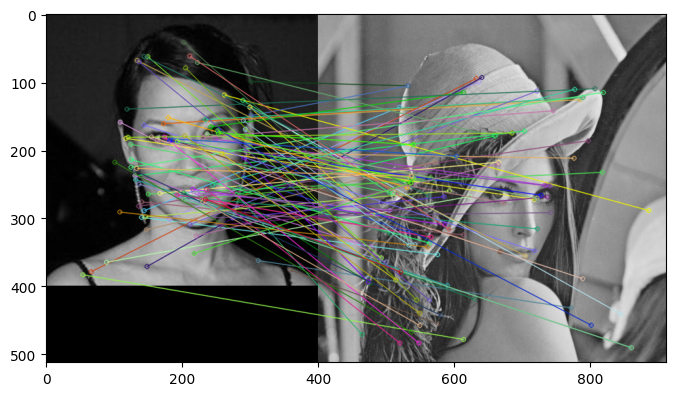

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(matched_img, cmap='gray')